<a href="https://colab.research.google.com/github/skboyina/Tensorflow_Coursera_code/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=15,10

In [5]:
#define header
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

In [7]:
#define number of columns from csv
use=list(np.arange(len(col)))

# print(use)

#read the data from csv
df_air=pd.read_csv("AirQualityUCI.csv",header=None,skiprows=1,names=col,na_filter=True,na_values=-200,usecols=use,sep=";", decimal=",",index_col="DATE")
df_air.head()

,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
DATE,,,,,,,,,,,,,,
10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [8]:
df_air.tail()

,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
DATE,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_air.dtypes

TIME             object
CO_GT           float64
PT08_S1_CO      float64
NMHC_GT         float64
C6H6_GT         float64
PT08_S2_NMHC    float64
NOX_GT          float64
PT08_S3_NOX     float64
NO2_GT          float64
PT08_S4_NO2     float64
PT08_S5_O3      float64
T               float64
RH              float64
AH              float64
dtype: object

In [11]:
  #drop end rows with NaN values
df_air.dropna(how='all',inplace=True)
#drop RH NAN rows
df_air.dropna(thresh=10,axis=0,inplace=True)

In [12]:
df_air.shape

(8991, 14)

In [13]:
  df_air.describe

<bound method NDFrame.describe of                 TIME  CO_GT  PT08_S1_CO  ...     T    RH      AH
DATE                                     ...                    
10/03/2004  18.00.00    2.6      1360.0  ...  13.6  48.9  0.7578
10/03/2004  19.00.00    2.0      1292.0  ...  13.3  47.7  0.7255
10/03/2004  20.00.00    2.2      1402.0  ...  11.9  54.0  0.7502
10/03/2004  21.00.00    2.2      1376.0  ...  11.0  60.0  0.7867
10/03/2004  22.00.00    1.6      1272.0  ...  11.2  59.6  0.7888
...              ...    ...         ...  ...   ...   ...     ...
04/04/2005  10.00.00    3.1      1314.0  ...  21.9  29.3  0.7568
04/04/2005  11.00.00    2.4      1163.0  ...  24.3  23.7  0.7119
04/04/2005  12.00.00    2.4      1142.0  ...  26.9  18.3  0.6406
04/04/2005  13.00.00    2.1      1003.0  ...  28.3  13.5  0.5139
04/04/2005  14.00.00    2.2      1071.0  ...  28.5  13.1  0.5028

[8991 rows x 14 columns]>

In [16]:
df_air['Hour'] = df_air['TIME'].apply(lambda x: int(x.split('.')[0]))
df_air.Hour.head()
df_air.head()

,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,Hour
DATE,,,,,,,,,,,,,,,
10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18
10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19
10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20
10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21
10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22


In [17]:
df_air.drop('TIME',axis=1,inplace=True)

In [18]:
df_air.head()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,Hour
DATE,,,,,,,,,,,,,,
10/03/2004,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18
10/03/2004,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19
10/03/2004,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20
10/03/2004,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21
10/03/2004,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22


In [22]:
  print(df_air.shape[0]-df_air.count())

CO_GT           1647
PT08_S1_CO         0
NMHC_GT         8104
C6H6_GT            0
PT08_S2_NMHC       0
NOX_GT          1595
PT08_S3_NOX        0
NO2_GT          1598
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 0
Hour               0
dtype: int64


In [23]:
df_air.head()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,Hour
DATE,,,,,,,,,,,,,,
10/03/2004,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18
10/03/2004,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19
10/03/2004,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20
10/03/2004,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21
10/03/2004,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22


In [29]:
  df_air['CO_GT']=df_air['CO_GT'].fillna(df_air.groupby(['DATE','Hour'])['CO_GT'].transform('mean'))
  df_air['NO2_GT']=df_air['NO2_GT'].fillna(df_air.groupby(['DATE','Hour'])['NO2_GT'].transform('mean'))
  df_air['NOX_GT']=df_air['NOX_GT'].fillna(df_air.groupby(['DATE','Hour'])['NOX_GT'].transform('mean'))

In [30]:
print(df_air.shape[0]-df_air.count())

CO_GT           1647
PT08_S1_CO         0
NMHC_GT         8104
C6H6_GT            0
PT08_S2_NMHC       0
NOX_GT          1595
PT08_S3_NOX        0
NO2_GT          1598
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 0
Hour               0
dtype: int64


In [31]:
  df_air['CO_GT']=df_air['CO_GT'].fillna(df_air.groupby(['Hour'])['CO_GT'].transform('mean'))
  df_air['NO2_GT']=df_air['NO2_GT'].fillna(df_air.groupby(['Hour'])['NO2_GT'].transform('mean'))
  df_air['NOX_GT']=df_air['NOX_GT'].fillna(df_air.groupby(['Hour'])['NOX_GT'].transform('mean'))

In [32]:
print(df_air.shape[0]-df_air.count())

CO_GT              0
PT08_S1_CO         0
NMHC_GT         8104
C6H6_GT            0
PT08_S2_NMHC       0
NOX_GT             0
PT08_S3_NOX        0
NO2_GT             0
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 0
Hour               0
dtype: int64


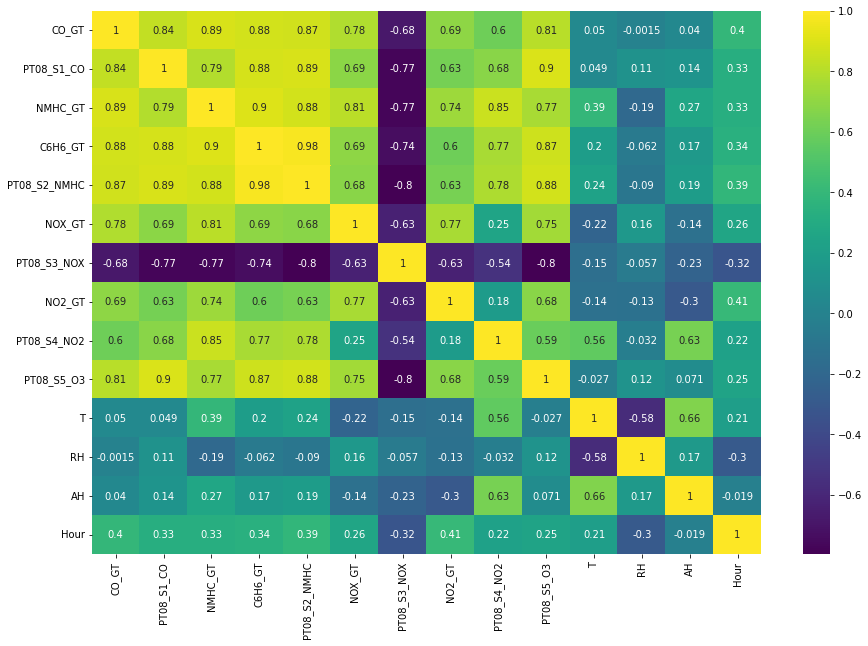

In [34]:
sns.heatmap(df_air.corr(),annot=True,cmap='viridis')
# plt.title('Heatmap')
# plt.show()

In [46]:
from keras.models import Sequential, load_model, save_model
from keras.layers import Dense
from keras.layers import LSTM
import glob
from datetime import datetime
from keras.callbacks import EarlyStopping
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [52]:
dataset = df_air.RH.values
dataset = dataset.astype('float32')
dataset = np.reshape(dataset,(-1,1))
scalar = MinMaxScaler(feature_range=(0, 1))
dataset = scalar.fit_transform(dataset)
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size

In [54]:
train_size
test_size

2698

In [55]:
train,test = dataset[0:train_size,:],dataset[train_size:len(dataset),:]

In [57]:
# print(len(train),len(test))
print(range(len(dataset)))

range(0, 8991)
